# DSitW assigment 1
### Jonathan Hirko
#### Presentation can be found here https://docs.google.com/presentation/d/1z-Vu03GhMkpPWpI0niFU2ktcZjZoCBPzxFGJ7m7tWj4/edit?usp=sharing

# Import and process data

In [229]:
#import the csv data into a data frame for exploration
import pandas as pd

##To test on your own system, change the path below to the location of your data set

path = '/Users/jonathan/Desktop/DSW_Data/WA_Fn-UseC_-Telco-Customer-Churn.csv'
initial_df = pd.read_csv(path)



In [230]:
#Get a sense of the data
initial_df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [231]:
#explore data types
initial_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null object
dtypes: float64(1), int64(2), obj

In [232]:
#Find categorical columns that can be on-hot encoded
columns = list(initial_df)
cat =[]
for i in columns:
    if initial_df[i].dtype =='object':
        if i != 'customerID' and i != 'TotalCharges':
            cat.append(i)
print(cat)

['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']


In [233]:
#look at unique values in each cat column 
for i in cat:
    print (initial_df[i].unique())

['Female' 'Male']
['Yes' 'No']
['No' 'Yes']
['No' 'Yes']
['No phone service' 'No' 'Yes']
['DSL' 'Fiber optic' 'No']
['No' 'Yes' 'No internet service']
['Yes' 'No' 'No internet service']
['No' 'Yes' 'No internet service']
['No' 'Yes' 'No internet service']
['No' 'Yes' 'No internet service']
['No' 'Yes' 'No internet service']
['Month-to-month' 'One year' 'Two year']
['Yes' 'No']
['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
['No' 'Yes']


In [234]:
#change totalcharges to numberic and allow nans. Detected these nans by noticing that TotalCharges appeared as an object dtype
initial_df['TotalCharges']=pd.to_numeric(initial_df['TotalCharges'],errors='coerce')



In [235]:
#one-hot encode cat calumns and create a new df
hot_df = pd.get_dummies(initial_df, columns = cat, drop_first=True)
hot_df.head()

#it appreas that all columns are represented

,customerID,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,...,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes
0,7590-VHVEG,0,1,29.85,29.85,0,1,0,0,1,...,0,0,0,0,0,1,0,1,0,0
1,5575-GNVDE,0,34,56.95,1889.50,1,0,0,1,0,...,0,0,0,1,0,0,0,0,1,0
2,3668-QPYBK,0,2,53.85,108.15,1,0,0,1,0,...,0,0,0,0,0,1,0,0,1,1
3,7795-CFOCW,0,45,42.30,1840.75,1,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
4,9237-HQITU,0,2,70.70,151.65,0,0,0,1,0,...,0,0,0,0,0,1,0,1,0,1


In [236]:
hot_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 32 columns):
customerID                               7043 non-null object
SeniorCitizen                            7043 non-null int64
tenure                                   7043 non-null int64
MonthlyCharges                           7043 non-null float64
TotalCharges                             7032 non-null float64
gender_Male                              7043 non-null uint8
Partner_Yes                              7043 non-null uint8
Dependents_Yes                           7043 non-null uint8
PhoneService_Yes                         7043 non-null uint8
MultipleLines_No phone service           7043 non-null uint8
MultipleLines_Yes                        7043 non-null uint8
InternetService_Fiber optic              7043 non-null uint8
InternetService_No                       7043 non-null uint8
OnlineSecurity_No internet service       7043 non-null uint8
OnlineSecurity_Yes                

In [237]:
hot_df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes
count,7043.000000,7043.000000,7043.000000,7032.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,...,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2283.300441,0.504756,0.483033,0.299588,0.903166,0.096834,0.421837,...,0.384353,0.216669,0.387903,0.209144,0.240664,0.592219,0.216101,0.335794,0.228880,0.265370
std,0.368612,24.559481,30.090047,2266.771362,0.500013,0.499748,0.458110,0.295752,0.295752,0.493888,...,0.486477,0.412004,0.487307,0.406726,0.427517,0.491457,0.411613,0.472301,0.420141,0.441561
min,0.000000,0.000000,18.250000,18.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,9.000000,35.500000,401.450000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,29.000000,70.350000,1397.475000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,55.000000,89.850000,3794.737500,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,...,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000
max,1.000000,72.000000,118.750000,8684.800000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [238]:
#drop customerId since it is not needed
hot_df.drop(['customerID'],axis =1, inplace = True)

In [239]:
#Look at what % of users have certain attributes
hot_df.sum()/7043

SeniorCitizen                               0.162147
tenure                                     32.371149
MonthlyCharges                             64.761692
TotalCharges                             2279.734304
gender_Male                                 0.504756
Partner_Yes                                 0.483033
Dependents_Yes                              0.299588
PhoneService_Yes                            0.903166
MultipleLines_No phone service              0.096834
MultipleLines_Yes                           0.421837
InternetService_Fiber optic                 0.439585
InternetService_No                          0.216669
OnlineSecurity_No internet service          0.216669
OnlineSecurity_Yes                          0.286668
OnlineBackup_No internet service            0.216669
OnlineBackup_Yes                            0.344881
DeviceProtection_No internet service        0.216669
DeviceProtection_Yes                        0.343888
TechSupport_No internet service             0.

In [240]:
#detected Nans with the SVM, so search for nans
hot_df.isna().sum()

SeniorCitizen                             0
tenure                                    0
MonthlyCharges                            0
TotalCharges                             11
gender_Male                               0
Partner_Yes                               0
Dependents_Yes                            0
PhoneService_Yes                          0
MultipleLines_No phone service            0
MultipleLines_Yes                         0
InternetService_Fiber optic               0
InternetService_No                        0
OnlineSecurity_No internet service        0
OnlineSecurity_Yes                        0
OnlineBackup_No internet service          0
OnlineBackup_Yes                          0
DeviceProtection_No internet service      0
DeviceProtection_Yes                      0
TechSupport_No internet service           0
TechSupport_Yes                           0
StreamingTV_No internet service           0
StreamingTV_Yes                           0
StreamingMovies_No internet serv

In [241]:
#Since there are only 11 rows with nans, I'll just drop Nans
hot_df.dropna(inplace=True)

# Explore data

In [242]:
#what percent of the data is of customers that "churned"
hot_df['Churn_Yes'].sum()/hot_df['Churn_Yes'].count()

0.26578498293515357

array([<matplotlib.axes._subplots.AxesSubplot object at 0x1a1d6a7cf8>,
      dtype=object)

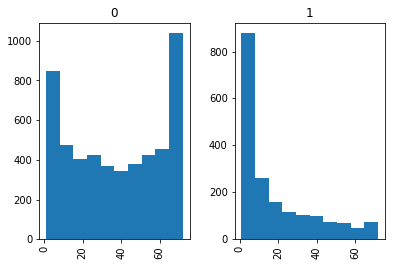

In [243]:
#look at the relationship between churn and tenure
hot_df.hist(column ='tenure', by='Churn_Yes')

array([<matplotlib.axes._subplots.AxesSubplot object at 0x10821a978>,
      dtype=object)

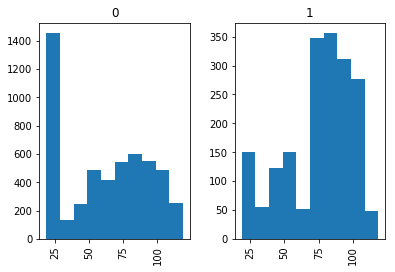

In [244]:
#look at the relationship between churn and tenure
hot_df.hist(column ='MonthlyCharges', by='Churn_Yes')

#### Multiple lines

Percent multiple line churned 0.286098956580276


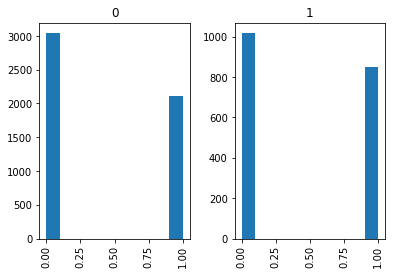

In [245]:
#look at the relationship between churn and multiple line
hot_df.hist(column ='MultipleLines_Yes', by='Churn_Yes')

totalMtM= (initial_df['MultipleLines'] =='Yes').sum()
MandC = ((initial_df['MultipleLines'] == 'Yes') & (initial_df['Churn'] == 'Yes')).sum()
print('Percent multiple line churned ' + str((MandC/totalMtM)))



In [246]:
#look at the relationship between churn and no multiple lines

totalMtM= (initial_df['MultipleLines'] =='No').sum()
MandC = ((initial_df['MultipleLines'] == 'No') & (initial_df['Churn'] == 'Yes')).sum()
print('Percent NO multiple line churned ' + str((MandC/totalMtM)))



Percent NO multiple line churned 0.2504424778761062


In [247]:
#look at the relationship between churn and no phone service

totalMtM= (initial_df['MultipleLines'] =='No phone service').sum()
MandC = ((initial_df['MultipleLines'] == 'No phone service') & (initial_df['Churn'] == 'Yes')).sum()
print('Percent NO phone service churned ' + str((MandC/totalMtM)))



Percent NO phone service churned 0.24926686217008798


#### Payments

Percent CC pmts churned 0.15243101182654403


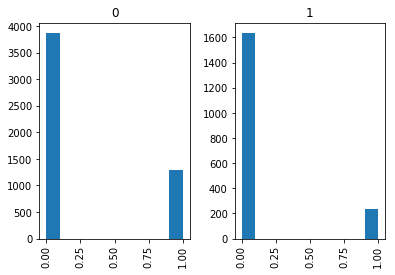

In [248]:
#look at the relationship between churn and payment by cc
hot_df.hist(column ='PaymentMethod_Credit card (automatic)', by='Churn_Yes')

totalMtM= (initial_df['PaymentMethod'] =='Credit card (automatic)').sum()
MandC = ((initial_df['PaymentMethod'] == 'Credit card (automatic)') & (initial_df['Churn'] == 'Yes')).sum()
print('Percent CC pmts churned ' + str((MandC/totalMtM)))



Percent E-check pmts churned 0.4528541226215645


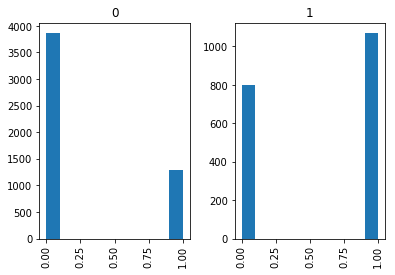

In [249]:
#look at the relationship between churn and elec check
hot_df.hist(column ='PaymentMethod_Electronic check', by='Churn_Yes')

totalMtM= (initial_df['PaymentMethod'] =='Electronic check').sum()
MandC = ((initial_df['PaymentMethod'] == 'Electronic check') & (initial_df['Churn'] == 'Yes')).sum()
print('Percent E-check pmts churned ' + str((MandC/totalMtM)))



Percent mailed-check pmts churned 0.19106699751861042


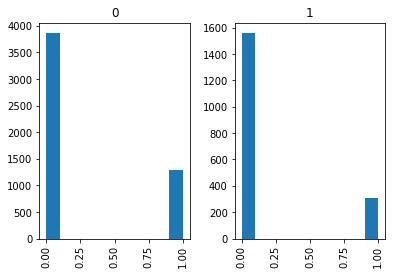

In [250]:
#look at the relationship between churn and payment by check
hot_df.hist(column ='PaymentMethod_Mailed check', by='Churn_Yes')

totalMtM= (initial_df['PaymentMethod'] =='Mailed check').sum()
MandC = ((initial_df['PaymentMethod'] == 'Mailed check') & (initial_df['Churn'] == 'Yes')).sum()
print('Percent mailed-check pmts churned ' + str((MandC/totalMtM)))



In [251]:
#look at the relationship between churn and Bank transfer (automatic)

totalMtM= (initial_df['PaymentMethod'] =='Bank transfer (automatic)').sum()
MandC = ((initial_df['PaymentMethod'] == 'Bank transfer (automatic)') & (initial_df['Churn'] == 'Yes')).sum()
print('Percent Bank transfer (automatic) pmts churned ' + str((MandC/totalMtM)))



Percent Bank transfer (automatic) pmts churned 0.16709844559585493


#### Age

Percent Senior citizens who churned 0.4168126094570928


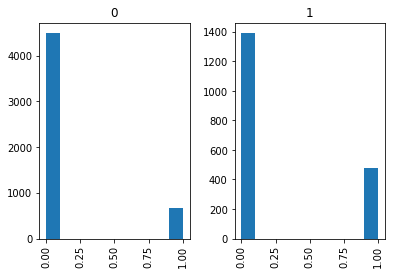

In [252]:
#look at the relationship between churn and age classification
hot_df.hist(column ='SeniorCitizen', by='Churn_Yes')

totalMtM= (initial_df['SeniorCitizen'] == 1).sum()
MandC = ((initial_df['SeniorCitizen'] == 1) & (initial_df['Churn'] == 'Yes')).sum()
print('Percent Senior citizens who churned ' + str((MandC/totalMtM)))


#### Contracts

Percent one year contracts who churned 0.11269517990495587


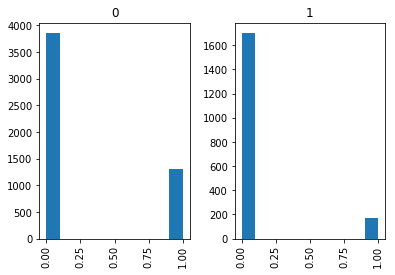

In [253]:
#look at the relationship between churn and contract length
hot_df.hist(column ='Contract_One year', by='Churn_Yes')

totalMtM= (initial_df['Contract'] == 'One year').sum()
MandC = ((initial_df['Contract'] == 'One year') & (initial_df['Churn'] == 'Yes')).sum()
print('Percent one year contracts who churned ' + str((MandC/totalMtM)))


array([<matplotlib.axes._subplots.AxesSubplot object at 0x1a1db89fd0>,
      dtype=object)

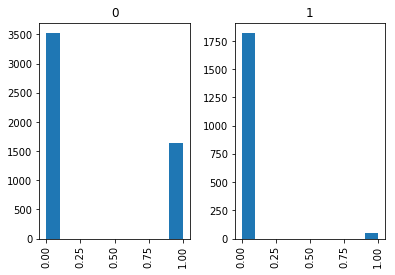

In [254]:
#look at the relationship between churn and contract length
hot_df.hist(column ='Contract_Two year', by='Churn_Yes')



In [255]:
#see how many month to month contracts chunred

totalMtM= (initial_df['Contract'] =='Month-to-month').sum()
MandC = ((initial_df['Contract'] == 'Month-to-month') & (initial_df['Churn'] == 'Yes')).sum()
print('Percent month to month contracts churned ' + str((MandC/totalMtM)))

# 43% of mtm contracts churned, which is far higher than other contract types



Percent month to month contracts churned 0.4270967741935484


# Split test and training data

In [256]:
from sklearn.model_selection import train_test_split

X, y = hot_df.loc[:, hot_df.columns != 'Churn_Yes'], hot_df['Churn_Yes']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)


# Balance Data

In [257]:
#Check the balance of data
print("Before OverSampling, counts of label '1': {}".format(sum(y_train==1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train==0)))
print("Percent of data that is class churn " +  str(sum(y_train==1)/((sum(y_train==1)+sum(y_train==0)))))

Before OverSampling, counts of label '1': 1259
Before OverSampling, counts of label '0': 3452 

Percent of data that is class churn 0.26724686902992995


In [258]:
#balance data by using SMOTE
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=42)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train.ravel())

print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))

print("After OverSampling, counts of label '1': {}".format(sum(y_train_res==1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res==0)))

After OverSampling, the shape of train_X: (6904, 30)
After OverSampling, the shape of train_y: (6904,) 

After OverSampling, counts of label '1': 3452
After OverSampling, counts of label '0': 3452


# Create evaluation metrics

In [259]:
#Generate metrics for the model

def get_metrics(y,p):
    from sklearn.metrics import confusion_matrix
    from sklearn.metrics import f1_score
    from sklearn.metrics import accuracy_score
    import numpy as np
    
    #accuracy
    acc = accuracy_score(y, p)
    print('Accuracy: ' + str(acc))
    
    #confusion matrix
    print('                   tn, fp, fn, tp')
    tn, fp, fn, tp = confusion_matrix(y, p).ravel()
    C = confusion_matrix(y, p).ravel()
    print('Confusion martix: ' +str((C / C.astype(np.float).sum())))
    
    #precision
    precision = tp/(tp+fp)
    print('Precision: '+ str(precision))
    
    #f score
    print('F score: ' + str(f1_score(y, p)))
    
    #Error rate
    er = (fp+fn)/(fp+fn+tn+tp)
    print('Error rate ' + str(er))

In [260]:
#function to plot ROC
def roc_plot(model, x, y, p):
    from sklearn import metrics
    probs = model.predict_proba(x)
    preds = probs[:,1]
    fpr, tpr, threshold = metrics.roc_curve(y, p)
    roc_auc = metrics.auc(fpr, tpr)

    # method I: plt
    import matplotlib.pyplot as plt
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()
    

# Run Models

### Random Forest

In [261]:
from sklearn.metrics import accuracy_score
#random forest with imbalanced data
from sklearn.ensemble import RandomForestClassifier


clf = RandomForestClassifier(n_estimators=500, max_depth=10, random_state=42)
clf.fit(X_train, y_train)

pred = clf.predict(X_test)
get_metrics(y_test, pred)

Accuracy: 0.8039638087031452
                   tn, fp, fn, tp
Confusion martix: [0.66996984 0.06721241 0.12882378 0.13399397]
Precision: 0.6659528907922913
F score: 0.5775301764159703
Error rate 0.19603619129685482


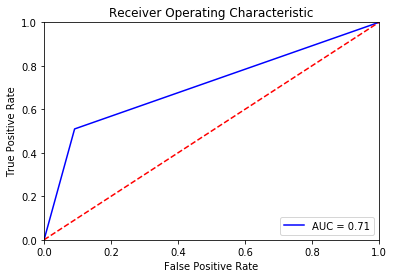

In [262]:
roc_plot(clf, X_test, y_test, pred)

In [263]:
#random forest with BALANCED data
from sklearn.ensemble import RandomForestClassifier


clf = RandomForestClassifier(n_estimators=500, max_depth=10, random_state=42)
clf.fit(X_train_res, y_train_res)

pred = clf.predict(X_test)
get_metrics(y_test, pred)

Accuracy: 0.7884532529082292
                   tn, fp, fn, tp
Confusion martix: [0.62171478 0.11546747 0.09607928 0.16673847]
Precision: 0.5908396946564886
F score: 0.6118577075098814
Error rate 0.2115467470917708


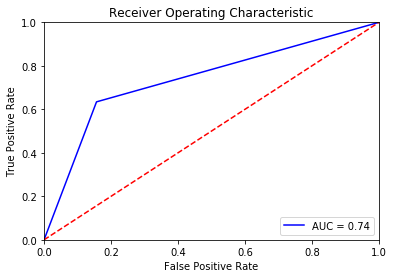

In [264]:
roc_plot(clf, X_test, y_test, pred)

Feature ranking:
1. feature 28 (0.130214)
2. feature 1 (0.113006)
3. feature 25 (0.084228)
4. feature 3 (0.082718)
5. feature 10 (0.059453)
6. feature 13 (0.057884)
7. feature 24 (0.053573)
8. feature 26 (0.050720)
9. feature 19 (0.049468)
10. feature 2 (0.048621)
11. feature 6 (0.032819)
12. feature 5 (0.029607)
13. feature 15 (0.023395)
14. feature 4 (0.016367)
15. feature 27 (0.014806)
16. feature 18 (0.014483)
17. feature 17 (0.013818)
18. feature 0 (0.013061)
19. feature 9 (0.012815)
20. feature 12 (0.012438)
21. feature 23 (0.011389)
22. feature 29 (0.010892)
23. feature 22 (0.010043)
24. feature 20 (0.009863)
25. feature 16 (0.009741)
26. feature 21 (0.009396)
27. feature 11 (0.009344)
28. feature 14 (0.006740)
29. feature 8 (0.004577)
30. feature 7 (0.004521)


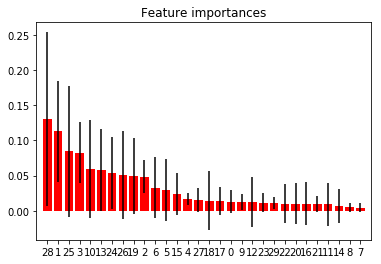

In [265]:
#Feature importance
import numpy as np
import matplotlib.pyplot as plt

importances = clf.feature_importances_
std = np.std([tree.feature_importances_ for tree in clf.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()

### Logistic Regression

In [266]:
#LogReg with imbalanced data
from sklearn.linear_model import LogisticRegression
clf_log = LogisticRegression(random_state=42).fit(X_train, y_train)
pred_log = clf_log.predict(X_test)
get_metrics(y_test, pred)

Accuracy: 0.7884532529082292
                   tn, fp, fn, tp
Confusion martix: [0.62171478 0.11546747 0.09607928 0.16673847]
Precision: 0.5908396946564886
F score: 0.6118577075098814
Error rate 0.2115467470917708


/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


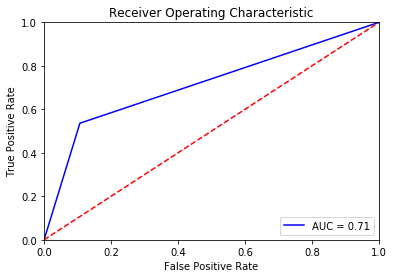

In [267]:
roc_plot(clf_log, X_test, y_test, pred_log)

In [268]:
#LogReg with balanced data
clf_log = LogisticRegression(random_state=42).fit(X_train_res, y_train_res)
pred = clf_log.predict(X_test)
get_metrics(y_test,pred)

Accuracy: 0.7483843171046962
                   tn, fp, fn, tp
Confusion martix: [0.53726842 0.19991383 0.05170185 0.2111159 ]
Precision: 0.5136268343815513
F score: 0.6265984654731458
Error rate 0.2516156828953037


/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


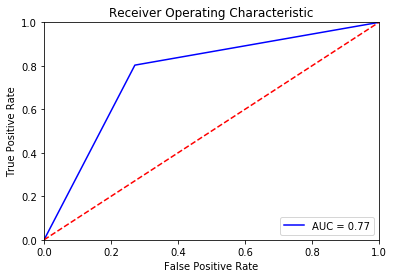

In [269]:
roc_plot(clf_log, X_test, y_test, pred)

### XGBoost

In [270]:
from xgboost import XGBClassifier 
# fit model to UNBALANCED training data
model = XGBClassifier(learning_rate = 0.05, n_estimators=200, max_depth=4)
model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.05, max_delta_step=0,
       max_depth=4, min_child_weight=1, missing=None, n_estimators=200,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [271]:
# make predictions for test set
y_pred = model.predict(X_test)

# evaluate predictions
get_metrics(y_test, y_pred)


Accuracy: 0.8026712623869022
                   tn, fp, fn, tp
Confusion martix: [0.66393796 0.07324429 0.12408445 0.1387333 ]
Precision: 0.6544715447154471
F score: 0.5843920145190563
Error rate 0.1973287376130978


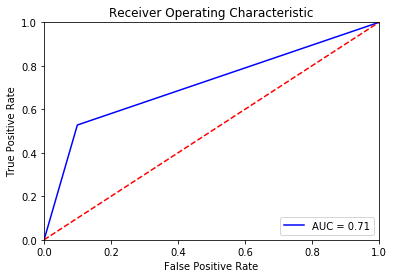

In [272]:
roc_plot(model, X_test, y_test, y_pred)

#### Had issues using the balanced data in this model

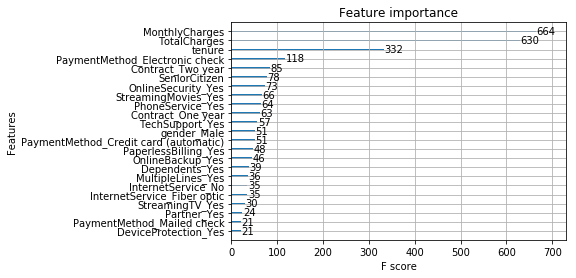

In [273]:
#show feature importance
import matplotlib.pyplot as plt
from xgboost import plot_importance

# plot feature importance
plot_importance(model)
plt.show()
